Importación de librerías y carga de datos

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Ruta al archivo CSV descargado
csv_file = 'Datasets/Reducidos/dataset_unificado3_sin_egresados.csv' # @param


Se importan las librerías necesarias para análisis de datos y visualización. Se define la ruta del archivo CSV que contiene el dataset.

In [45]:
# Importar el CSV a un DataFrame de Pandas

dataset = pd.read_csv(csv_file, delimiter=';')

# Mostrar las primeras filas del DataFrame
dataset.head()

C:\Users\joaco\AppData\Local\Temp\ipykernel_8608\1071965574.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv(csv_file, delimiter=';')


,AGNO,NOM_COM_RBD,COD_DEPE2,RURAL_RBD,ESTADO_ESTAB,COD_ENSE,COD_ENSE2,COD_GRADO,COD_JOR,GEN_ALU,EDAD_ALU,NOM_COM_ALU,PROM_GRAL,ASISTENCIA,SIT_FIN_R,MRUN,SIT_FIN,AÑO,estado
0,2018,ARICA,1,0,1,463,8,3,4,2,23,ARICA,0,0,T,710054,NaN,Rendimiento_2018.csv,abandono_entre_años
1,2018,ARICA,1,0,1,463,8,3,4,2,50,ARICA,0,0,Y,4895728,NaN,Rendimiento_2018.csv,abandono_entre_años
2,2018,ARICA,1,0,1,463,8,3,4,1,20,ARICA,0,0,Y,8445111,NaN,Rendimiento_2018.csv,abandono_entre_años
3,2018,ARICA,1,0,1,463,8,3,4,2,22,SAN MIGUEL,0,0,T,11169999,NaN,Rendimiento_2018.csv,abandono_entre_años
4,2018,ARICA,1,0,1,463,8,3,4,1,25,ARICA,0,0,T,15780854,NaN,Rendimiento_2018.csv,abandono_entre_años


Se lee el archivo CSV usando pandas y se muestra un resumen de las primeras filas para verificar la correcta carga de los datos.

In [46]:
num_filas_len = len(dataset)
print(f"Número de filas usando len(): {num_filas_len}")


Número de filas usando len(): 4798878


Se seleccionan las columnas relevantes para el análisis y se crea un nuevo DataFrame solo con esas columnas.

In [48]:
columnas_usar = [
    'NOM_COM_RBD', 'COD_DEPE2', 'RURAL_RBD', 'ESTADO_ESTAB',
    'COD_ENSE2', 'COD_GRADO', 'COD_JOR', 'GEN_ALU',
    'EDAD_ALU', 'NOM_COM_ALU', 'PROM_GRAL', 'ASISTENCIA','estado'
]
df = dataset[columnas_usar].copy()

In [49]:
print(df.dtypes)
print(df.shape)

NOM_COM_RBD     object
COD_DEPE2        int64
RURAL_RBD        int64
ESTADO_ESTAB     int64
COD_ENSE2        int64
COD_GRADO        int64
COD_JOR          int64
GEN_ALU          int64
EDAD_ALU        object
NOM_COM_ALU     object
PROM_GRAL       object
ASISTENCIA       int64
estado          object
dtype: object
(4798878, 13)


Se convierten columnas a valores numéricos, se filtran edades fuera de rango, se reemplazan valores nulos y se crea la variable objetivo binaria ABANDONO
Ademas se convierten las variables categóricas a tipo string y luego se aplican variables dummy (one-hot encoding) para que puedan ser usadas en modelos de machine learning.

In [50]:
df['EDAD_ALU'] = pd.to_numeric(df['EDAD_ALU'], errors='coerce')
df['PROM_GRAL'] = pd.to_numeric(df['PROM_GRAL'], errors='coerce')
df['ASISTENCIA'] = pd.to_numeric(df['ASISTENCIA'], errors='coerce')
df = df[(df['EDAD_ALU'] >= 5) & (df['EDAD_ALU'] <= 75)]
df['PROM_GRAL'] = df['PROM_GRAL'].replace(0, np.nan)
df['PROM_GRAL'] = df['PROM_GRAL'].fillna(df['PROM_GRAL'].median())
df['ASISTENCIA'] = df['ASISTENCIA'].fillna(df['ASISTENCIA'].median())

# Filtrar solo las filas con estado 'abandono_entre_años' o 'cursando'
df = df[df['estado'].isin(['abandono_entre_años', 'cursando'])]

# Variable objetivo binaria: 1 si abandono_entre_años, 0 si cursando
df['ABANDONO'] = df['estado'].apply(lambda x: 1 if x == 'abandono_entre_años' else 0)

categ_vars = [
    'NOM_COM_RBD', 'COD_DEPE2', 'RURAL_RBD', 'ESTADO_ESTAB',
    'COD_ENSE2', 'COD_GRADO', 'COD_JOR', 'GEN_ALU', 'NOM_COM_ALU'
]
df[categ_vars] = df[categ_vars].astype(str)
df = pd.get_dummies(df, columns=categ_vars, drop_first=True)
print("Dataset limpio y preparado")
print("Dimensiones:", df.shape)
print("Distribución de ABANDONO:")
print(df['ABANDONO'].value_counts(normalize=True))

Dataset limpio y preparado
Dimensiones: (4686971, 728)
Distribución de ABANDONO:
ABANDONO
0    0.821928
1    0.178072
Name: proportion, dtype: float64


In [51]:
df.head()

,EDAD_ALU,PROM_GRAL,ASISTENCIA,estado,ABANDONO,NOM_COM_RBD_ALHUÉ,NOM_COM_RBD_ALTO BIOBÍO,NOM_COM_RBD_ALTO DEL CARMEN,NOM_COM_RBD_ALTO HOSPICIO,NOM_COM_RBD_ANCUD,...,NOM_COM_ALU_VILLA ALEMANA,NOM_COM_ALU_VILLARRICA,NOM_COM_ALU_VITACURA,NOM_COM_ALU_VIÑA DEL MAR,NOM_COM_ALU_YERBAS BUENAS,NOM_COM_ALU_YUMBEL,NOM_COM_ALU_YUNGAY,NOM_COM_ALU_ZAPALLAR,NOM_COM_ALU_ÑIQUÉN,NOM_COM_ALU_ÑUÑOA
0,23.0,6.0,0,abandono_entre_años,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,50.0,6.0,0,abandono_entre_años,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,20.0,6.0,0,abandono_entre_años,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,22.0,6.0,0,abandono_entre_años,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,25.0,6.0,0,abandono_entre_años,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


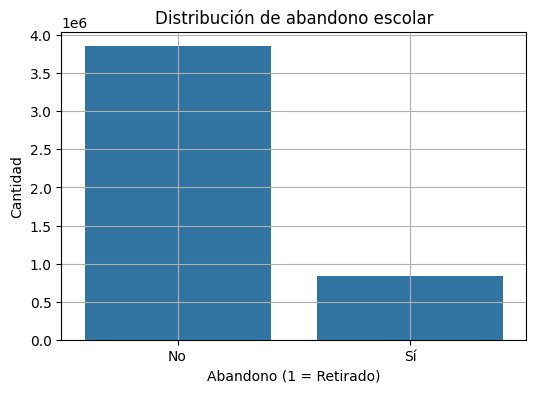

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.countplot(x='ABANDONO', data=df)
plt.title('Distribución de abandono escolar')
plt.xlabel('Abandono (1 = Retirado)')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['No', 'Sí'])
plt.grid(True)
plt.show()

In [53]:

df.head()

,EDAD_ALU,PROM_GRAL,ASISTENCIA,estado,ABANDONO,NOM_COM_RBD_ALHUÉ,NOM_COM_RBD_ALTO BIOBÍO,NOM_COM_RBD_ALTO DEL CARMEN,NOM_COM_RBD_ALTO HOSPICIO,NOM_COM_RBD_ANCUD,...,NOM_COM_ALU_VILLA ALEMANA,NOM_COM_ALU_VILLARRICA,NOM_COM_ALU_VITACURA,NOM_COM_ALU_VIÑA DEL MAR,NOM_COM_ALU_YERBAS BUENAS,NOM_COM_ALU_YUMBEL,NOM_COM_ALU_YUNGAY,NOM_COM_ALU_ZAPALLAR,NOM_COM_ALU_ÑIQUÉN,NOM_COM_ALU_ÑUÑOA
0,23.0,6.0,0,abandono_entre_años,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,50.0,6.0,0,abandono_entre_años,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,20.0,6.0,0,abandono_entre_años,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,22.0,6.0,0,abandono_entre_años,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,25.0,6.0,0,abandono_entre_años,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Se balancean las clases de la variable objetivo usando undersampling para evitar sesgos en el entrenamiento de los modelos.

Distribución original: Counter({0: 3852354, 1: 834617})
Distribución tras undersampling: Counter({0: 834617, 1: 834617})


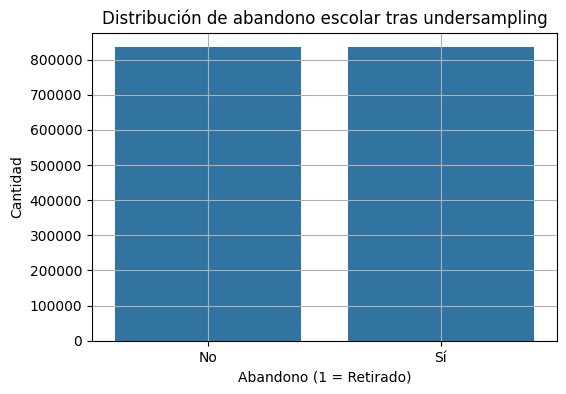

In [54]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Separar variables predictoras (X) y objetivo (y)
X = df.drop('ABANDONO', axis=1)
y = df['ABANDONO']

# Aplicar RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)

print(f'Distribución original: {Counter(y)}')
print(f'Distribución tras undersampling: {Counter(y_rus)}')

# Crear un nuevo DataFrame solo con los datos seleccionados por el undersampling
df_undersampled = X_rus.copy()
df_undersampled['ABANDONO'] = y_rus.values

# Visualizar la nueva distribución
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x=y_rus)
plt.title('Distribución de abandono escolar tras undersampling')
plt.xlabel('Abandono (1 = Retirado)')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['No', 'Sí'])
plt.grid(True)
plt.show()

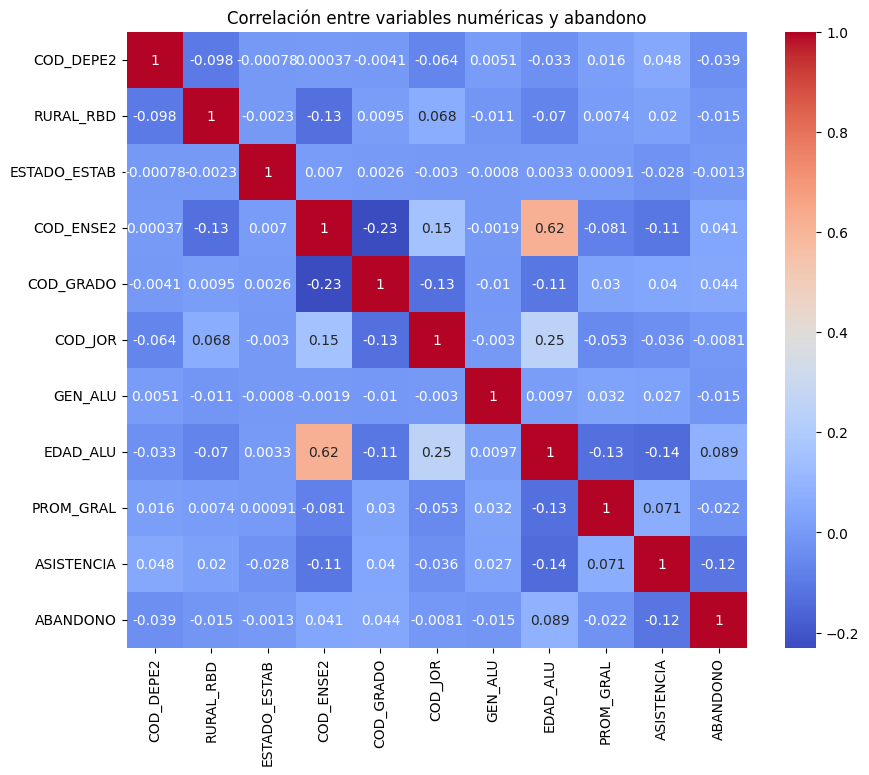

In [40]:
plt.figure(figsize=(10,8))
sns.heatmap(df[[
    'COD_DEPE2', 'RURAL_RBD', 'ESTADO_ESTAB',
    'COD_ENSE2', 'COD_GRADO', 'COD_JOR', 'GEN_ALU',
    'EDAD_ALU', 'PROM_GRAL', 'ASISTENCIA', 'ABANDONO' ]].corr(), annot=True, cmap='coolwarm')
plt.title('Correlación entre variables numéricas y abandono')
plt.show()

In [55]:
df = df.drop(columns=['COD_ENSE2'])

KeyError: "['COD_ENSE2'] not found in axis"

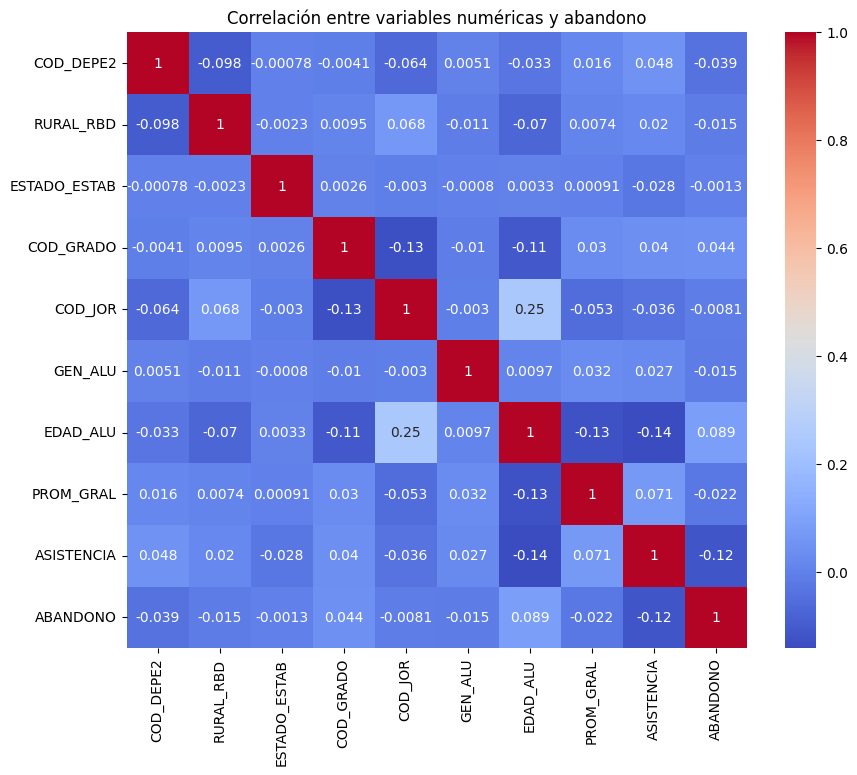

In [42]:
plt.figure(figsize=(10,8))
sns.heatmap(df[[
    'COD_DEPE2', 'RURAL_RBD', 'ESTADO_ESTAB',
    'COD_GRADO', 'COD_JOR', 'GEN_ALU',
    'EDAD_ALU', 'PROM_GRAL', 'ASISTENCIA', 'ABANDONO' ]].corr(), annot=True, cmap='coolwarm')
plt.title('Correlación entre variables numéricas y abandono')
plt.show()

Se reduce el DataFrame a 500,000 filas seleccionadas de forma aleatoria para facilitar el procesamiento y entrenamiento.

In [56]:

df = df.sample(n=500000, random_state=42)

In [58]:
print("Dimensiones:", df.shape)

Dimensiones: (500000, 728)


Se dividen los datos en entrenamiento y prueba, se entrena un modelo de regresión logística y se muestran métricas de desempeño y la matriz de confusión.

C:\Users\joaco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


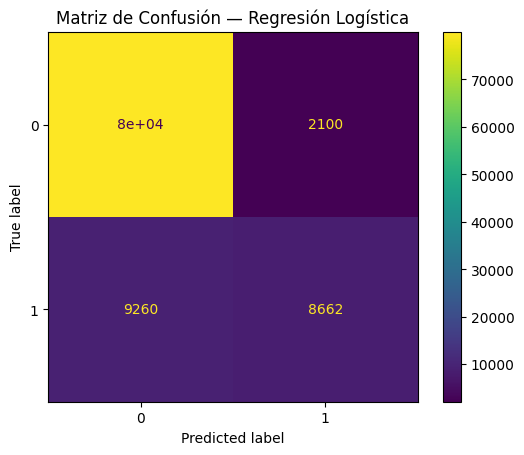

📋 Reporte de Clasificación:
              precision    recall  f1-score   support

 No Abandona       0.90      0.97      0.93     82078
    Abandona       0.80      0.48      0.60     17922

    accuracy                           0.89    100000
   macro avg       0.85      0.73      0.77    100000
weighted avg       0.88      0.89      0.87    100000



In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
X = df.drop(columns=['estado', 'ABANDONO'])
y = df['ABANDONO']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Matriz de Confusión — Regresión Logística")
plt.show()
print("📋 Reporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=['No Abandona', 'Abandona']))

In [59]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
modelos = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}
resultados = []
for nombre, modelo in modelos.items():
    
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    resultados.append({
        "Modelo": nombre,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred)
    })
resultados_df = pd.DataFrame(resultados).sort_values(by="Recall", ascending=False)
display(resultados_df)

C:\Users\joaco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\joaco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [16:50:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,Modelo,Accuracy,Precision,Recall,F1-score
1,Random Forest,0.88856,0.742661,0.578730,0.650527
3,XGBoost,0.90265,0.851102,0.553677,0.670904
2,Gradient Boosting,0.89980,0.844584,0.540341,0.659045
0,Logistic Regression,0.88640,0.804869,0.483317,0.603960


Se entrenan y evalúan varios modelos de clasificación. Se comparan sus métricas (accuracy, precision, recall, F1-score) y se muestran ordenados por recall.

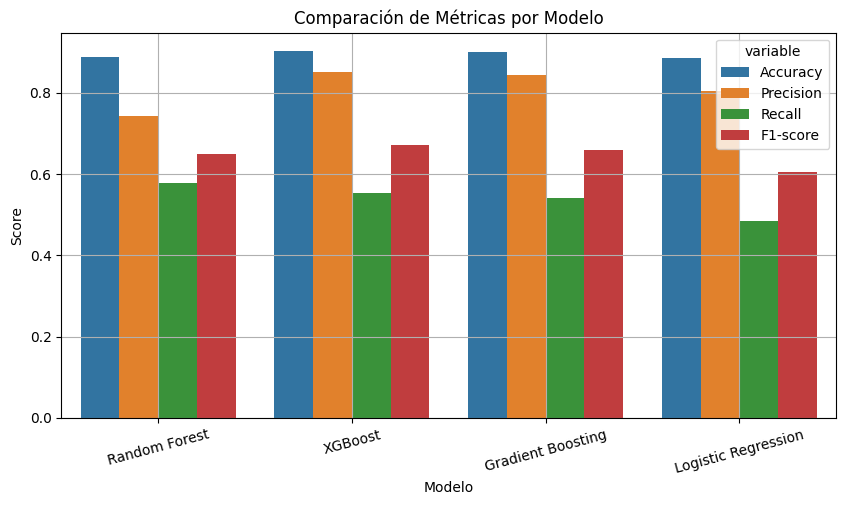

In [60]:
plt.figure(figsize=(10,5))
sns.barplot(data=resultados_df.melt(id_vars='Modelo'), x='Modelo', y='value', hue='variable')
plt.title('Comparación de Métricas por Modelo')
plt.ylabel('Score')
plt.xticks(rotation=15)
plt.grid(True)
plt.show()

In [61]:
from xgboost import XGBClassifier

# Entrena el modelo
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

C:\Users\joaco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [16:54:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [62]:
y_pred = xgb_model.predict(X_test)
resultados.append({
    "Modelo": nombre,
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1-score": f1_score(y_test, y_pred)
})
resultados_df = pd.DataFrame(resultados).sort_values(by="Recall", ascending=False)
display(resultados_df)

,Modelo,Accuracy,Precision,Recall,F1-score
1,Random Forest,0.88856,0.742661,0.578730,0.650527
4,XGBoost,0.90265,0.851102,0.553677,0.670904
3,XGBoost,0.90265,0.851102,0.553677,0.670904
2,Gradient Boosting,0.89980,0.844584,0.540341,0.659045
0,Logistic Regression,0.88640,0.804869,0.483317,0.603960


Se guarda el modelo entrenado y las columnas usadas en el entrenamiento para su uso posterior en aplicaciones de predicción.

In [63]:
import joblib


joblib.dump(xgb_model, 'modelo_entrenado_XGBoost.pkl')

# (Opcional) Guarda las columnas usadas para el entrenamiento
with open('columnas_modelo.txt', 'w') as f:
    for col in X_train.columns:
        f.write(f"{col}\n")
